In [1]:
# The model has real trouble classifying cats and dogs (.55 accuracy)
# taking a look at the low res of the images, it is not surprising
# I switched to cars and cats
# The object to classify can be selected below

In [2]:
cat1 = 1
cat2 = 3

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
norm = tf.math.reduce_max(x_train)

In [7]:
x_train, x_test = x_train / norm, x_test / norm

In [8]:
import matplotlib.pyplot as plt

array([3], dtype=uint8)

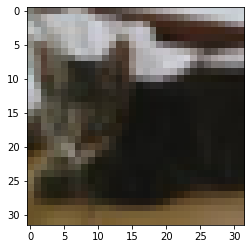

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
index=9
ax.imshow(x_train[index])
y_train[index]

In [10]:
# Select the samples that are cat1 or cat2 (cats or cars)
#1. Makea matrix with True where cat is cat1 or cat2

In [11]:
cats_and_dogs_train_indexes=(y_train==cat1) + (y_train==cat2)

In [12]:
# this matrix needs reshaping from (x, 1) to (x,)

In [13]:
cats_and_dogs_train_indexes=tf.reshape(cats_and_dogs_train_indexes, [tf.size(cats_and_dogs_train_indexes)])

In [14]:
# Select corresponding x_train

In [15]:
x_train = tf.boolean_mask(x_train, cats_and_dogs_train_indexes)

In [16]:
# Select corresponding y_train and change labels to 0 (cat1) or 1 (cat2)

In [17]:
y_train = tf.where(tf.boolean_mask(y_train, cats_and_dogs_train_indexes)==cat1, 0, 1)

In [18]:
# Same for test set

In [19]:
cats_and_dogs_test_indexes=(y_test==cat1) + (y_test==cat2)

In [20]:
cats_and_dogs_test_indexes=tf.reshape(cats_and_dogs_test_indexes, [tf.size(cats_and_dogs_test_indexes)])

In [21]:
x_test = tf.boolean_mask(x_test, cats_and_dogs_test_indexes)

In [22]:
y_test = tf.where(tf.boolean_mask(y_test, cats_and_dogs_test_indexes)==cat1, 0, 1)

In [23]:
# 5 epoch, .8739
# 10 epoch .8840
# 50 epoch .9070
#model = tf. keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(32,32,3)),
#  tf.keras.layers.Dense(256, activation='relu'),
#  tf.keras.layers.Dense(64, activation='relu'),
#  tf.keras.layers.Dense(16, activation='relu'),
#  tf.keras.layers.Dense(1, activation='sigmoid')
#])

In [24]:
# 5 epoch, .8775
# 50 epoch, .8980
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
# 5 epochs. .8665 
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(32,32,3)),
#  tf.keras.layers.Dense(1028, activation='relu'),
#  tf.keras.layers.Dense(1, activation='sigmoid')
#])

In [26]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [27]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=50)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 166us/sample - loss: 0.5428 - accuracy: 0.7437
Epoch 2/50
10000/10000 [==============================] - 1s 142us/sample - loss: 0.4220 - accuracy: 0.8108
Epoch 3/50
10000/10000 [==============================] - 1s 143us/sample - loss: 0.3632 - accuracy: 0.8410
Epoch 4/50
10000/10000 [==============================] - 1s 142us/sample - loss: 0.3261 - accuracy: 0.8617
Epoch 5/50
10000/10000 [==============================] - 1s 142us/sample - loss: 0.3045 - accuracy: 0.8748
Epoch 6/50
10000/10000 [==============================] - 1s 143us/sample - loss: 0.2920 - accuracy: 0.8772
Epoch 7/50
10000/10000 [==============================] - 1s 143us/sample - loss: 0.2827 - accuracy: 0.8838
Epoch 8/50
10000/10000 [==============================] - 1s 143us/sample - loss: 0.2741 - accuracy: 0.8897
Epoch 9/50
10000/10000 [==============================] - 1s 145us/sample - loss: 0.2495 - accuracy: 0.9008
Epoch

In [29]:
model.evaluate(x_test,  y_test, verbose=2)

2000/2000 - 0s - loss: 0.3168 - accuracy: 0.8980


[0.3168377935290337, 0.898]

In [30]:
preds=tf.cast(tf.math.round(model.predict(x_test)),tf.int32)

In [31]:
index=0
[y_test[index:index+10], preds[index:index+10]]

[<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=int32)>]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>

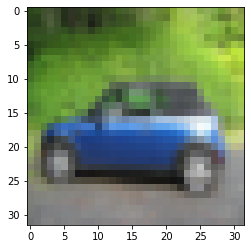

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
index=14
ax.imshow(x_test[index])
y_test[index]

In [33]:
# Lets show the missmatches

In [34]:
mm_mask=tf.reshape(tf.math.logical_not(tf.math.equal(y_test, preds)),[2000])

In [35]:
mm=tf.boolean_mask(x_test, mm_mask)

In [36]:
tf.shape(mm)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([204,  32,  32,   3], dtype=int32)>

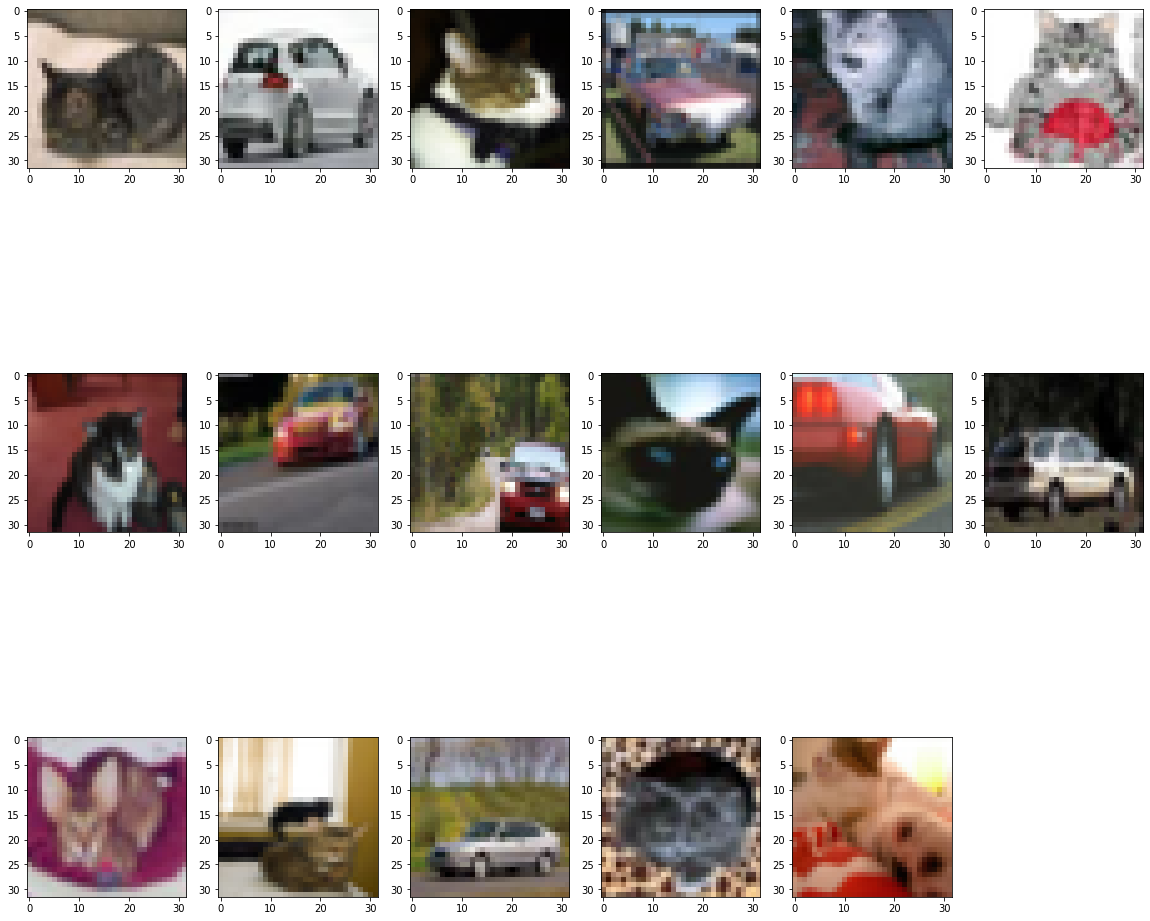

In [37]:
fig=plt.figure(figsize=(20,200))
for i in range(1,18):
    ax=fig.add_subplot(30,6,i)
    ax.imshow(mm[i])

In [38]:
22000/2000

11.0